<a href="https://colab.research.google.com/github/PrakashRanjanShrivastava/Credit_Risk_Analysis/blob/main/Credit_risk_analysis_geeklurn_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Description: 

age - Age of Customer 

ed - Eductation level of customer 

employ: Tenure with current employer (in years) 

address: Number of years in same address 

income: Customer Income 

debtinc: Debt to income ratio (the percentage of your gross monthly income that is used to pay your monthly debt and determines your borrowing risk.)
  
  `As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. Ideally, lenders prefer a debt-to-income ratio lower than 36%`

creddebt: Credit to Debt ratio (represents the amount of revolving credit you're using divided by the total amount of credit available to you)

      `A good debt-to-credit ratio percentage is below 30%`

othdebt: Other debts 

default: Customer defaulted in the past (1= defaulted, 0=Never defaulted) 

Importing libraries


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io


Importing Data(CSV File)

In [ ]:
from google.colab import files
Data_to_load = files.upload()

Saving bankloans.csv to bankloans.csv


In [ ]:
df_loan = pd.read_csv(io.BytesIO(Data_to_load['bankloans.csv']))

In [ ]:
df_loan.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [ ]:
df_loan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [ ]:
df_loan['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [ ]:
from sklearn.impute import SimpleImputer

Here we need to fill missing values by knn imputer.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
#impute = KNNImputer(n_neighbors=5)
#df1 = pd.DataFrame(impute.fit_transform(df_loan[['default']]))


In [ ]:
#df1.rename(columns = {0:'default'},inplace =True)

In [ ]:
#df1

#####Here , We can not use KNNimputer as it will create Data other than 0,1 -----Instead we will use fillna technique to raplace nan value with Mode  

In [ ]:
df_loan['default'] = df_loan['default'].fillna(df_loan['default'].mode()[0])

In [ ]:
df_loan.tail()

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
845   34   1      12       15      32      2.7  0.239328  0.624672      0.0
846   32   2      12       11     116      5.7  4.026708  2.585292      0.0
847   48   1      13       11      38     10.8  0.722304  3.381696      0.0
848   35   2       1       11      24      7.8  0.417456  1.454544      0.0
849   37   1      20       13      41     12.9  0.899130  4.389870      0.0

In [ ]:
df_loan['default'].value_counts()

0.0    667
1.0    183
Name: default, dtype: int64

In [ ]:
df_loan['default'].unique()

array([1., 0.])

In [ ]:
df_loan.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

As we there is class imbalance in 'default' varible 

So, we will treat the class imbalance by SMOTE method.

In [ ]:
df_loan.describe()

age          ed      employ     address      income     debtinc  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    35.029412    1.710588    8.565882    8.371765   46.675294   10.171647   
std      8.041432    0.927784    6.777884    6.895016   38.543054    6.719441   
min     20.000000    1.000000    0.000000    0.000000   13.000000    0.100000   
25%     29.000000    1.000000    3.000000    3.000000   24.000000    5.100000   
50%     34.000000    1.000000    7.000000    7.000000   35.000000    8.700000   
75%     41.000000    2.000000   13.000000   12.000000   55.750000   13.800000   
max     56.000000    5.000000   33.000000   34.000000  446.000000   41.300000   

         creddebt     othdebt     default  
count  850.000000  850.000000  850.000000  
mean     1.576805    3.078789    0.215294  
std      2.125840    3.398803    0.411268  
min      0.011696    0.045584    0.000000  
25%      0.382176    1.045942    0.000000  
50%      0.885091    2.003243    0.000000  
75%      1.898440    3.903001    0.000000  
max     20.561310   35.197500    1.000000

From above description we can see that no Debtinc is more than 43% and no creddebt is more than 30%. So, the customers are safe as per DTI and CDB ratios thresholds.

Now we will plot all features 


In [ ]:
#plt.figure(figsize=(10,8))
#plt.suptitle('Univariate Analysis', fontsize = 20,fontweight = 'bold')
#fig= plt.subplots(2,2 , figsize =(11,15))

#for columns in enumerate(df1.cloumns):
 # sns.histplot(data = df1, x = df1.columns, bins =20,kde = True, multiple ="stack")

#fig.tight_layout()

#for i in range(0,len(df1.columns)):
  #plt.subplot(2,2,i+1)
  #sns.kdeplot(x = df1.columns[i], shade = True, color  ='b')
  #plt.xlabel(df1.columns[i])
  #plt.tight_layout()
   



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
columns = df_loan.columns
colummmns = list(columns)
columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

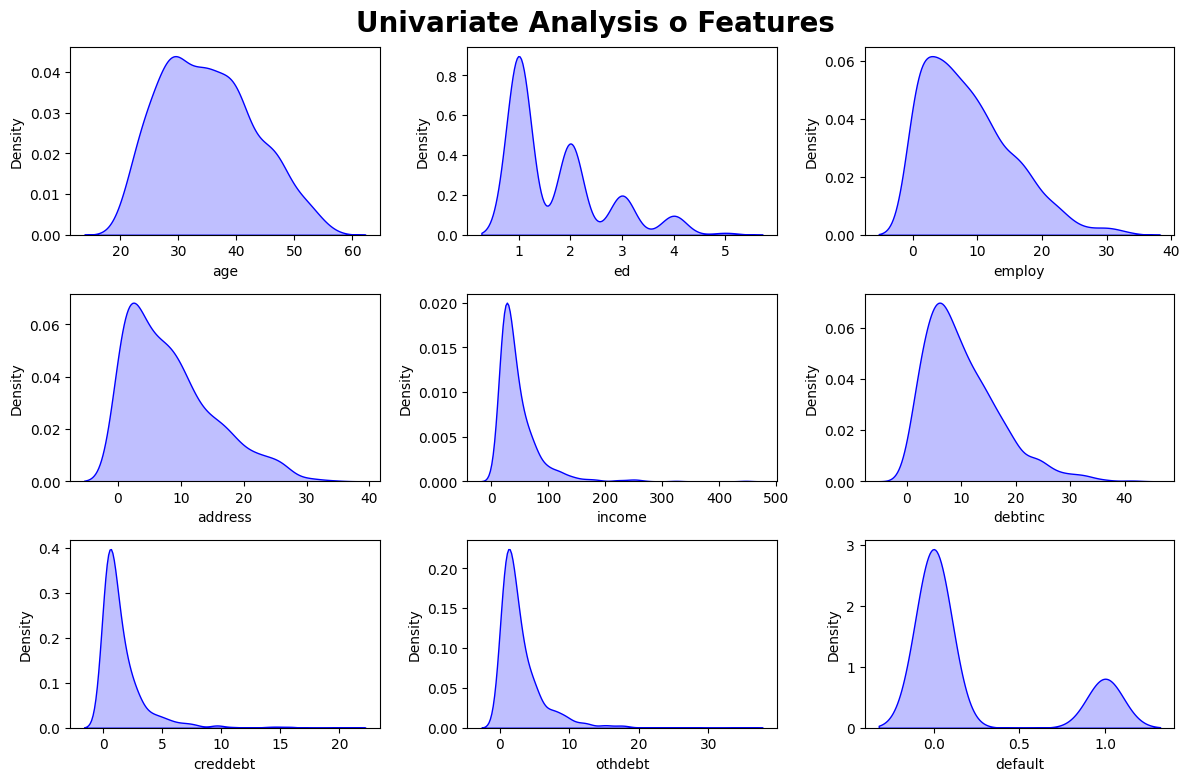

In [ ]:
plt.figure(figsize=(12,10))
plt.suptitle('Univariate Analysis o Features', fontsize = 20,fontweight = 'bold')

for i in range(0,len(columns)):
  plt.subplot(4,3,i+1)
  sns.kdeplot(x = df_loan[columns[i]], shade  = True, color = 'b')
  plt.xlabel(columns[i])
  plt.tight_layout()

##Bi-Variate ANalysis

<Axes: xlabel='default', ylabel='age'>

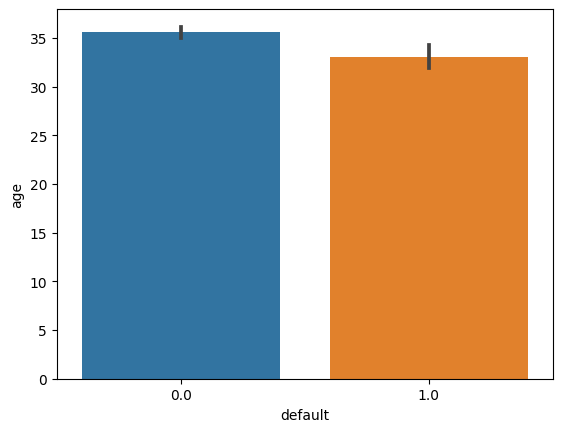

In [ ]:
#We will do analysis with respect to Default column
sns.barplot(x='default',y='age',data=df_loan)

For age factor both 0 and  1 are almost same, It means age does not really matter wether the customer will Deafult or Not.

<Axes: xlabel='default', ylabel='ed'>

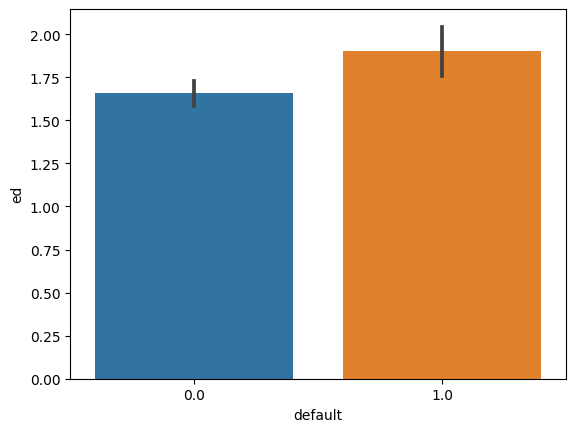

In [ ]:
sns.barplot(x='default',y='ed',data=df_loan)

From above we can infer that  higher the education level is the person is more likely to default

<Axes: xlabel='default', ylabel='employ'>

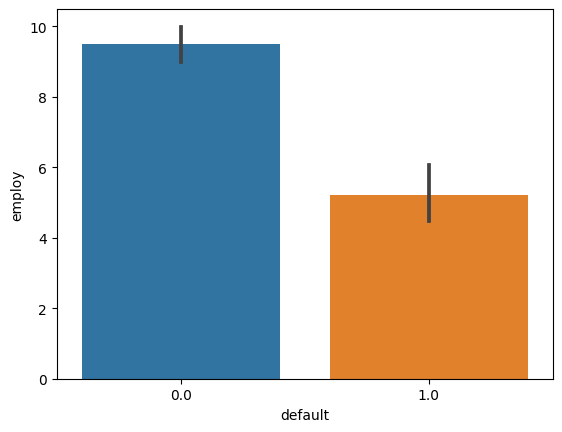

In [ ]:
sns.barplot(x='default',y='employ',data=df_loan)

As the tenure with same employer increases the person is less likely to Default

<Axes: xlabel='default', ylabel='address'>

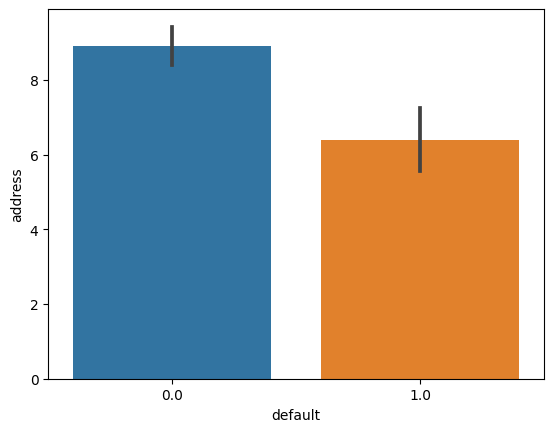

In [ ]:
sns.barplot(x='default',y='address',data=df_loan)

As the number of years in same address increases the person is less likely to Default

<Axes: xlabel='default', ylabel='income'>

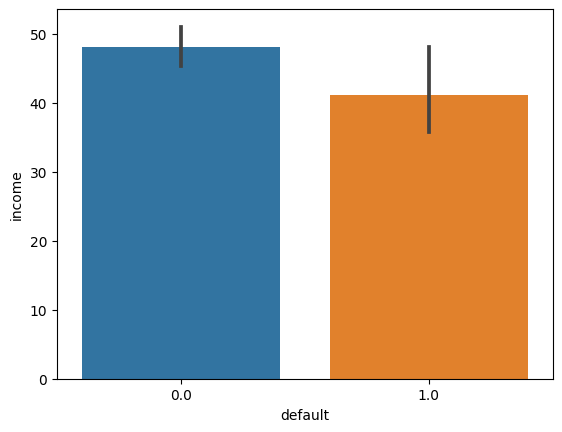

In [ ]:
sns.barplot(x='default',y='income',data=df_loan)

The more income ,Less  likely TO Default

<Axes: xlabel='default', ylabel='debtinc'>

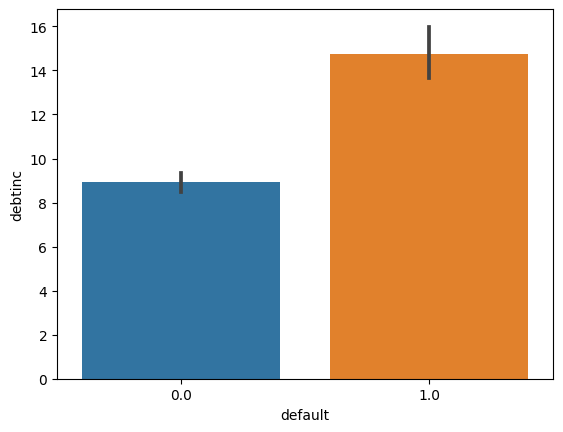

In [ ]:
sns.barplot(x='default',y='debtinc',data=df_loan)

As debt to income ratio increses , The person is more likely to Default

<Axes: xlabel='default', ylabel='creddebt'>

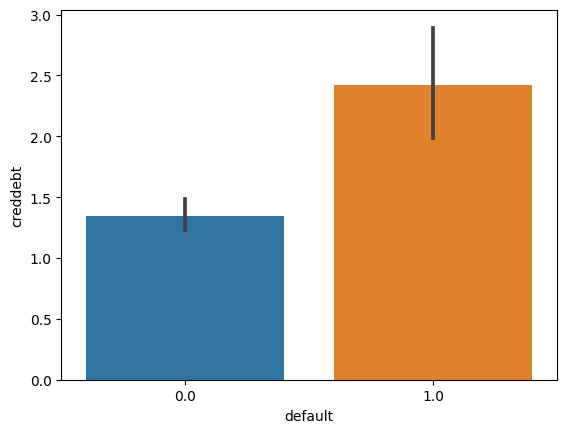

In [ ]:
sns.barplot(x='default',y='creddebt',data=df_loan)

As credit to debt ratio increses , The person is more likely to Default

<Axes: xlabel='default', ylabel='othdebt'>

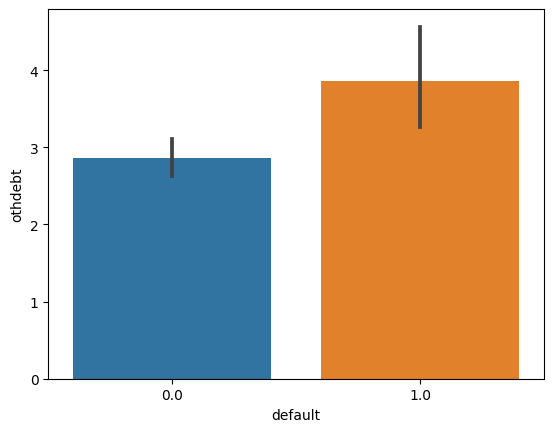

In [ ]:
sns.barplot(x='default',y='othdebt',data=df_loan)

As other number  increses , The person is more likely to Default

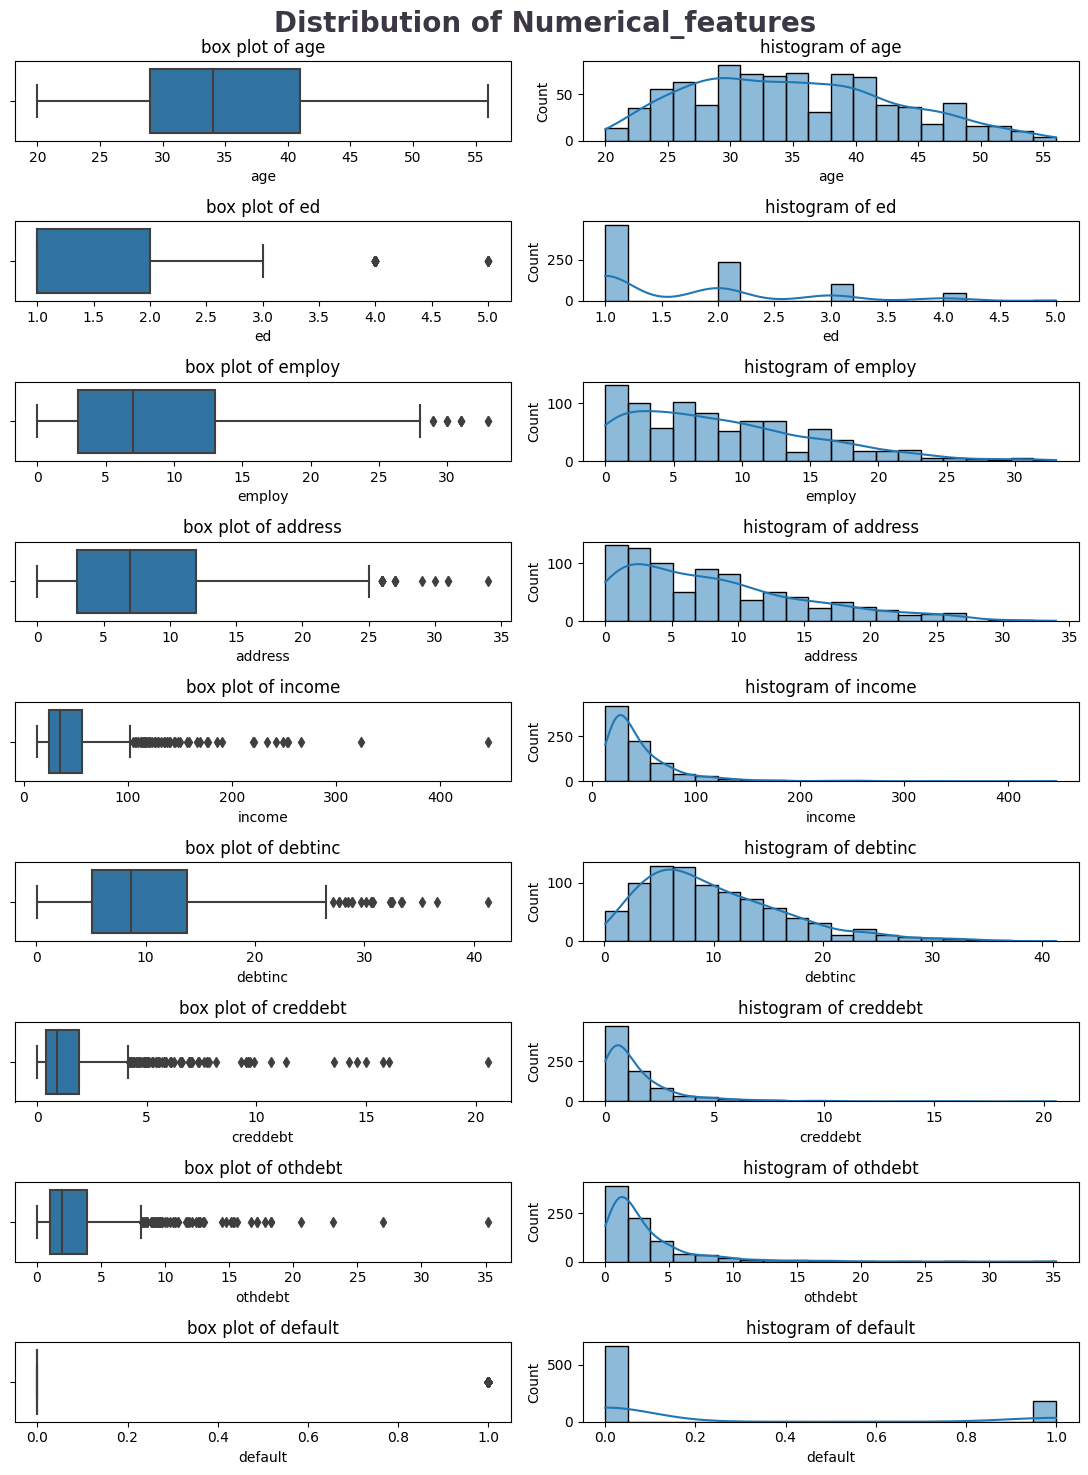

In [ ]:
fig,ax = plt.subplots(9,2, figsize =(11,15))
fig.suptitle('Distribution of Numerical_features',color = "#3C3744",fontsize = 20,fontweight = 'bold')


for i ,col in enumerate(columns):
  sns.boxplot(data = df_loan,x = col, ax = ax[i,0])
  ax[i,0].set_title(f'box plot of {col}',fontsize = 12)
  sns.histplot(data = df_loan, x = col, bins =20,kde = True, multiple ="stack", ax =ax[i,1])
  ax[i,1].set_title(f'histogram of {col}',fontsize = 12)
fig.tight_layout()


Here Some of factors needs Removal outliers,  As they may affect the prediction.

`As there is no out liers in default column , So we need to remove that column and divide the data`

In [ ]:
X=df_loan.drop("default",axis=1)
Y=df_loan['default']

In [ ]:
Y.unique()

array([1., 0.])

##OutLier Treatment

In [ ]:
def detect_outliers(col):
  percentile75 = int(X[col].quantile(0.75))
  percentile25 = int(X[col].quantile(0.25))
  print('\n ####',col,"####")
  print('percentile25=',percentile25)
  print('percentile75=',percentile75)
  iqr = percentile75-percentile25
  lowerlimit = percentile25-1.5*iqr
  upperlimit = percentile75+1.5*iqr

  print('lowerlimt =',lowerlimit)
  print('upperlimit =',upperlimit)

  X.loc[(X[col]>upperlimit),col] = upperlimit
  X.loc[(X[col]<lowerlimit),col] = lowerlimit

In [ ]:
for col in columns:
 detect_outliers(col)


 #### age ####
percentile25= 29
percentile75= 41
lowerlimt = 11.0
upperlimit = 59.0

 #### ed ####
percentile25= 1
percentile75= 2
lowerlimt = -0.5
upperlimit = 3.5

 #### employ ####
percentile25= 3
percentile75= 13
lowerlimt = -12.0
upperlimit = 28.0

 #### address ####
percentile25= 3
percentile75= 12
lowerlimt = -10.5
upperlimit = 25.5

 #### income ####
percentile25= 24
percentile75= 55
lowerlimt = -22.5
upperlimit = 101.5

 #### debtinc ####
percentile25= 5
percentile75= 13
lowerlimt = -7.0
upperlimit = 25.0

 #### creddebt ####
percentile25= 0
percentile75= 1
lowerlimt = -1.5
upperlimit = 2.5

 #### othdebt ####
percentile25= 1
percentile75= 3
lowerlimt = -2.0
upperlimit = 6.0


KeyError: ignored

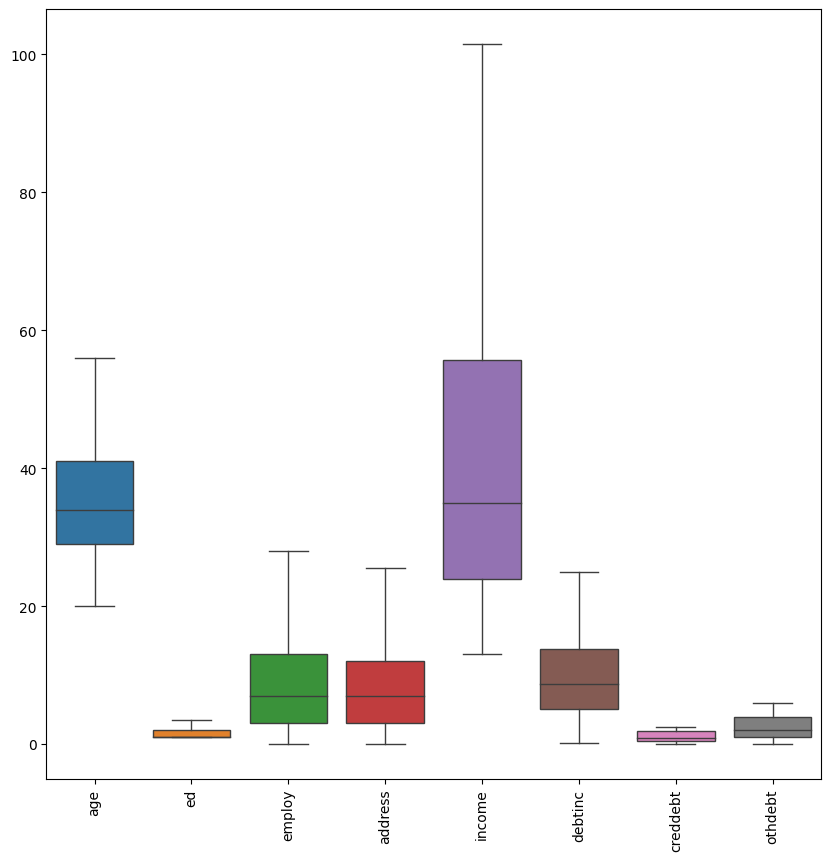

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(data = X, linewidth = 1)
plt.xticks(rotation  ='vertical')
plt.show()

Now, There is no Outliers inthe data

Now We need to cocanate the data for further  processing

In [ ]:
df_loan1 = pd.concat([X,Y], axis=1)

In [ ]:
df_loan1.head()

age   ed  employ  address  income  debtinc  creddebt   othdebt  default
0   41  3.0      17     12.0   101.5      9.3  2.500000  5.008608      1.0
1   27  1.0      10      6.0    31.0     17.3  1.362202  4.000798      0.0
2   40  1.0      15     14.0    55.0      5.5  0.856075  2.168925      0.0
3   41  1.0      15     14.0   101.5      2.9  2.500000  0.821280      0.0
4   24  2.0       2      0.0    28.0     17.3  1.787436  3.056564      1.0

###Checking correlation

In [ ]:
df_loan1[list(df_loan1.columns)[0:]].corr()

age        ed    employ   address    income   debtinc  \
age       1.000000  0.006962  0.553755  0.597740  0.551231  0.006964   
ed        0.006962  1.000000 -0.150553  0.050524  0.220488  0.011376   
employ    0.553755 -0.150553  1.000000  0.346253  0.713689 -0.042901   
address   0.597740  0.050524  0.346253  1.000000  0.334355 -0.029699   
income    0.551231  0.220488  0.713689  0.334355  1.000000 -0.019543   
debtinc   0.006964  0.011376 -0.042901 -0.029699 -0.019543  1.000000   
creddebt  0.292548  0.120121  0.340020  0.194478  0.498868  0.596902   
othdebt   0.356092  0.151539  0.411780  0.200131  0.590401  0.663084   
default  -0.131556  0.114428 -0.261499 -0.151642 -0.124757  0.352448   

          creddebt   othdebt   default  
age       0.292548  0.356092 -0.131556  
ed        0.120121  0.151539  0.114428  
employ    0.340020  0.411780 -0.261499  
address   0.194478  0.200131 -0.151642  
income    0.498868  0.590401 -0.124757  
debtinc   0.596902  0.663084  0.352448  
creddebt  1.000000  0.611951  0.177840  
othdebt   0.611951  1.000000  0.109299  
default   0.177840  0.109299  1.000000

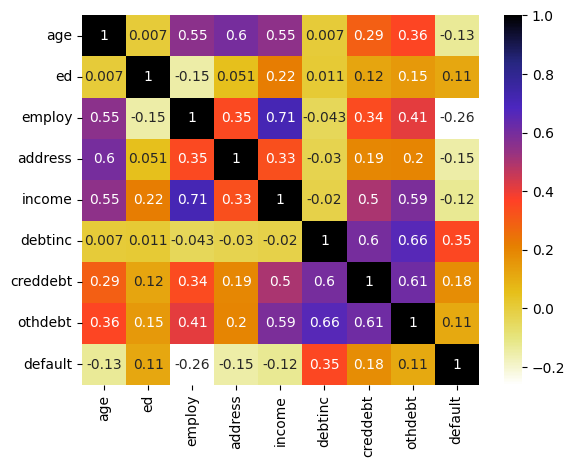

In [ ]:
sns.heatmap(data  = df_loan1.corr(),cmap = "CMRmap_r", annot =True)
plt.show()

As shown in the Heat map there is not much colinrearity exist between the Variables.

 So, We need not to worry about that

 Only the column othdebt is showing some high correlation 

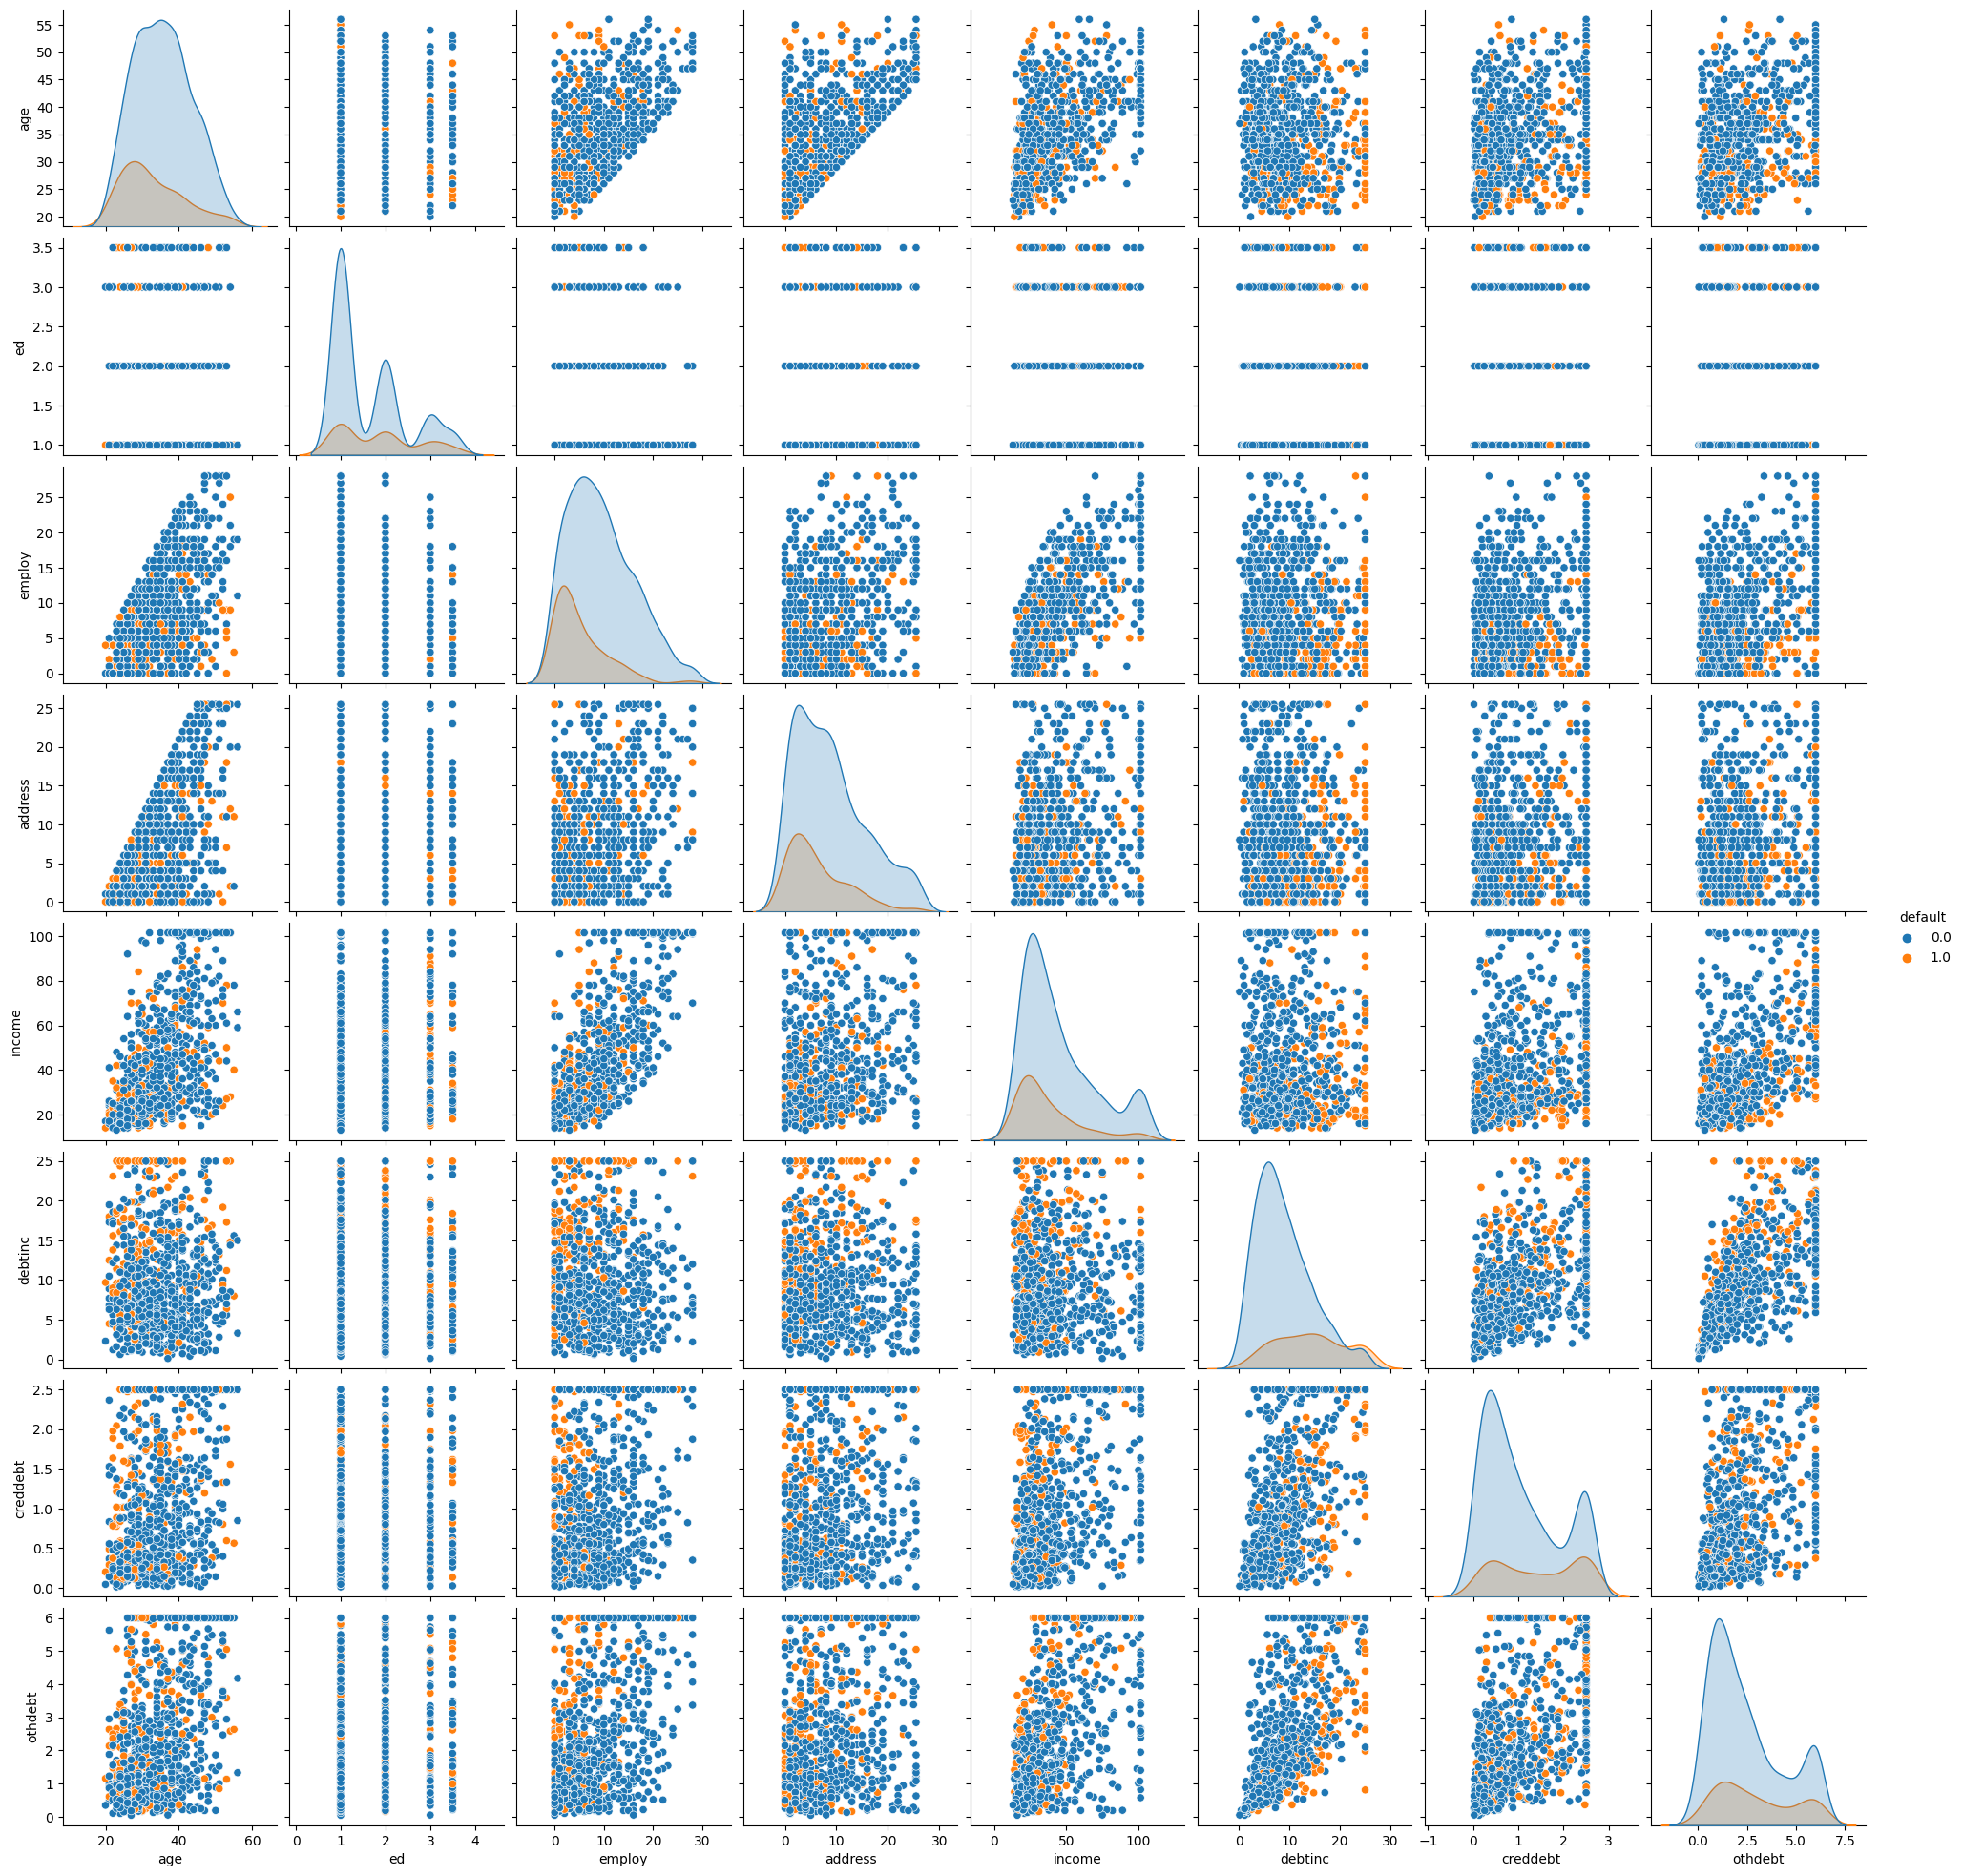

In [ ]:
sns.pairplot(data = df_loan1, hue = 'default')

 Checking Multi_Colinearity By VIF Factor

 For Selecting Best Features

In [ ]:
Y.unique()

array([1., 0.])

In [ ]:
X1=df_loan1.drop("default",axis=1)
Y1= pd.DataFrame(df_loan1['default'])

**CHI-Suare metho**d

In [ ]:
# we will not consider this ,, aS Chi squar test is used for catogrical data

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X1,Y1)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X1.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(6,'K_score'))

   Features     K_score
5   debtinc  410.070394
2    employ  303.373594
4    income  188.803976
3   address  107.334462
0       age   27.124481
6  creddebt   17.339385


**ANNOVA TEST Method**

In [ ]:
from sklearn.feature_selection import  f_classif

In [ ]:
Select_KBest_rank_features1=SelectKBest(score_func=f_classif,k=5)
KBest_features1=Select_KBest_rank_features1.fit(X1,Y1)

df_Kscores1=pd.DataFrame(KBest_features1.scores_,columns=["Score"])
dfcolumns1=pd.DataFrame(X1.columns)

kbest_features_rank1=pd.concat([dfcolumns1,df_Kscores1],axis=1)

kbest_features_rank1.columns=['Features','K_score']
kbest_features_rank1

print(kbest_features_rank1.nlargest(8,'K_score'))

**Vriance Influnce Method**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
V=[]
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X1.shape[1]):
  V.append(variance_inflation_factor(X1.values,j))
print(V)

np.transpose(V)
pd.DataFrame(X1.columns)
pd.DataFrame(np.transpose(V))
pd.concat([pd.DataFrame(X1.columns),pd.DataFrame(np.transpose(V))], axis =1)

[18.792829363217674, 5.805391616133498, 7.187965135694654, 3.704384163503227, 24.14047347688711, 16.549304770904975, 7.676471177154296, 14.212972442623164]


0          0
0       age  18.792829
1        ed   5.805392
2    employ   7.187965
3   address   3.704384
4    income  24.140473
5   debtinc  16.549305
6  creddebt   7.676471
7   othdebt  14.212972

**`Here according vif scores  the input  variables (income,debtinc,othdebt) are have not somuch variance but We can not Exclude Them as they are impotant factor to   whether the customer will Deafult or Not`**

 



###Scaling The Data

We will use Standarization mehod to Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_std = pd.DataFrame(sc.fit_transform(X1),columns = X1.columns)

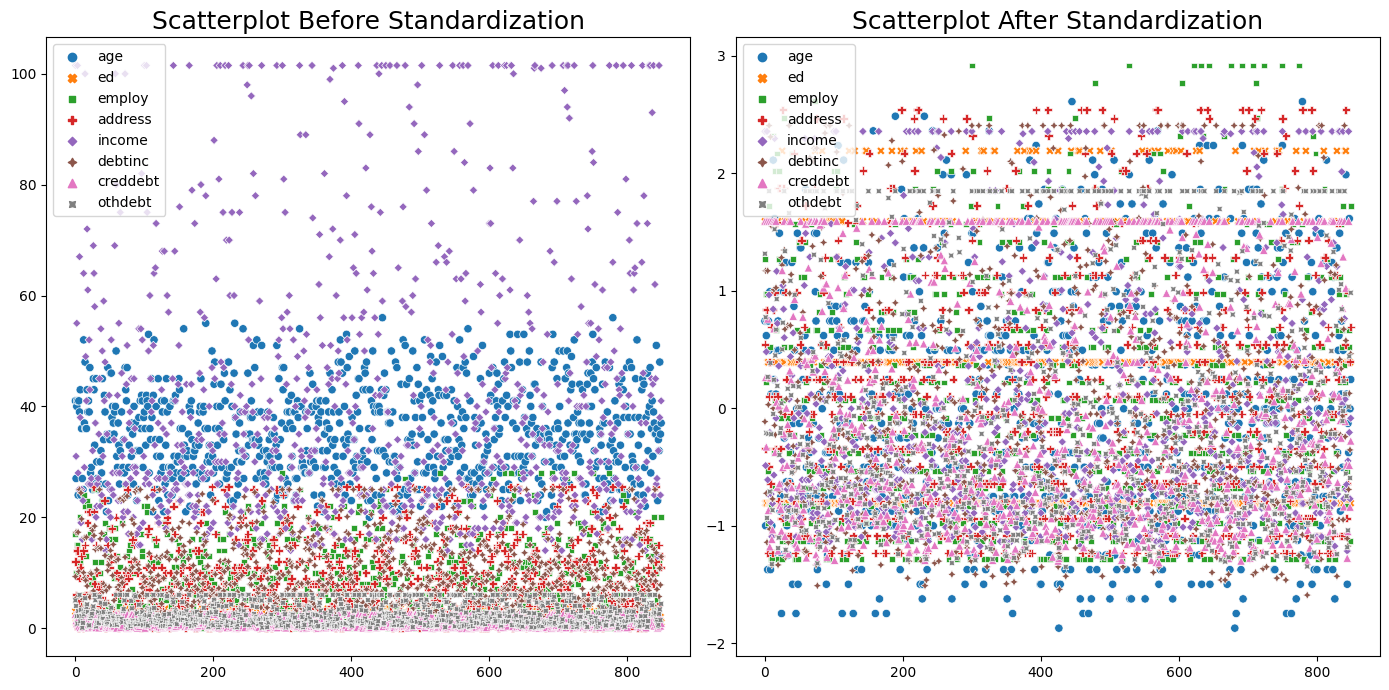

In [ ]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Standardization", fontsize=18)
sns.scatterplot(data = X1, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Standardization", fontsize=18)
sns.scatterplot(data = x_std, color="red")
plt.tight_layout()
plt.show()

#####Spltting the Data 

In [ ]:
 from sklearn.model_selection import train_test_split
x_train_st,x_test_st,y_train_st,y_test_st = train_test_split(x_std,Y1, random_state=40,test_size=0.25)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1, random_state=40,test_size=0.25)

In [ ]:
Y1.value_counts()

default
0.0        667
1.0        183
dtype: int64

In [ ]:
y_train.value_counts()

default
0.0        498
1.0        139
dtype: int64

###Now We will start Model Building 

**Logistic regerssion**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#with Standarized values
lgr_st=LogisticRegression()
lgr_st.fit(x_train_st,y_train_st)
y_pred_st = lgr_st.predict(x_test_st)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
print(confusion_matrix(y_test_st,y_pred_st))
print(accuracy_score(y_test_st,y_pred_st))
print(classification_report(y_test_st,y_pred_st))

[[160   9]
 [ 33  11]]
0.8028169014084507
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       169
         1.0       0.55      0.25      0.34        44

    accuracy                           0.80       213
   macro avg       0.69      0.60      0.61       213
weighted avg       0.77      0.80      0.77       213



In [ ]:
#without Standarized values
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_test)


print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[160   9]
 [ 32  12]]
0.8075117370892019
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       169
         1.0       0.57      0.27      0.37        44

    accuracy                           0.81       213
   macro avg       0.70      0.61      0.63       213
weighted avg       0.78      0.81      0.78       213



Now,,we will Balance Classes
 
As we can see there much imbalance in Classififcation Report



####WE wil Use  SMOTE Method To Balance Class

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X1,Y1)

In [ ]:
y_smote.value_counts()

default
0.0        667
1.0        667
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(x_smote,y_smote, random_state=40,test_size=0.25)

In [ ]:
lgr_sm=LogisticRegression()
lgr_sm.fit(x_train_sm,y_train_sm)
y_pred_sm = lgr_sm.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_test_sm,y_pred_sm))
print(accuracy_score(y_test_sm,y_pred_sm))
print(classification_report(y_test_sm,y_pred_sm))

[[160  13]
 [ 97  64]]
0.6706586826347305
              precision    recall  f1-score   support

         0.0       0.62      0.92      0.74       173
         1.0       0.83      0.40      0.54       161

    accuracy                           0.67       334
   macro avg       0.73      0.66      0.64       334
weighted avg       0.72      0.67      0.64       334



###Random Forest

In [ ]:
#Without Standaried values
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = 0.2, n_estimators = 34)
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)


print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[160   9]
 [ 35   9]]
0.7934272300469484
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       169
         1.0       0.50      0.20      0.29        44

    accuracy                           0.79       213
   macro avg       0.66      0.58      0.58       213
weighted avg       0.75      0.79      0.76       213



In [ ]:
#With standarized values
rf_st = RandomForestClassifier(max_features = 0.2, n_estimators = 34)
rf_st.fit(x_train_st,y_train_st)
y_pred_rf_st= rf_st.predict(x_test_st)


print(confusion_matrix(y_test_st,y_pred_rf_st))
print(accuracy_score(y_test_st,y_pred_rf_st))
print(classification_report(y_test_st,y_pred_rf_st))

[[162   7]
 [ 36   8]]
0.7981220657276995
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       169
         1.0       0.53      0.18      0.27        44

    accuracy                           0.80       213
   macro avg       0.68      0.57      0.58       213
weighted avg       0.76      0.80      0.76       213



In [ ]:
#with Balanced class data
rf_sm = RandomForestClassifier(max_features = 0.2, n_estimators = 28)
rf_sm.fit(x_train_sm,y_train_sm)
y_pred_rf_sm= rf.predict(x_test_sm)


print(confusion_matrix(y_test_sm,y_pred_rf_sm))
print(accuracy_score(y_test_sm,y_pred_rf_sm))
print(classification_report(y_test_sm,y_pred_rf_sm))

[[169   4]
 [ 61 100]]
0.8053892215568862
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       173
         1.0       0.96      0.62      0.75       161

    accuracy                           0.81       334
   macro avg       0.85      0.80      0.80       334
weighted avg       0.84      0.81      0.80       334



####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_model  = dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[151  18]
 [ 33  11]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       169
         1.0       0.38      0.25      0.30        44

    accuracy                           0.76       213
   macro avg       0.60      0.57      0.58       213
weighted avg       0.73      0.76      0.74       213



###**Now , We will try to build and evaluate model after Dropping columns (debtinc & Income)**

In [ ]:
X1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [ ]:
X2=X1.drop(["debtinc",'income'],axis=1)
X2

age   ed  employ  address  creddebt   othdebt
0     41  3.0      17     12.0  2.500000  5.008608
1     27  1.0      10      6.0  1.362202  4.000798
2     40  1.0      15     14.0  0.856075  2.168925
3     41  1.0      15     14.0  2.500000  0.821280
4     24  2.0       2      0.0  1.787436  3.056564
..   ...  ...     ...      ...       ...       ...
845   34  1.0      12     15.0  0.239328  0.624672
846   32  2.0      12     11.0  2.500000  2.585292
847   48  1.0      13     11.0  0.722304  3.381696
848   35  2.0       1     11.0  0.417456  1.454544
849   37  1.0      20     13.0  0.899130  4.389870

[850 rows x 6 columns]

lets bulid model with this X2 input varibles

In [ ]:
#sliptting  the data again  as the data is changed now(X2)
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X2,Y1, random_state=40,test_size=0.25)

In [ ]:
#Random Forest with X2
rf1 = RandomForestClassifier(max_features = 0.2, n_estimators = 34)
rf1.fit(x_train1,y_train1)
y_pred_rf1= rf1.predict(x_test1)


print(confusion_matrix(y_test1,y_pred_rf1))
print(accuracy_score(y_test1,y_pred_rf1))
print(classification_report(y_test1,y_pred_rf1))

[[161   8]
 [ 35   9]]
0.7981220657276995
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       169
         1.0       0.53      0.20      0.30        44

    accuracy                           0.80       213
   macro avg       0.68      0.58      0.59       213
weighted avg       0.76      0.80      0.76       213



`Logistic Regression with feature excluded`

In [ ]:
lgr1=LogisticRegression()
lgr1.fit(x_train1,y_train1)
y_pred1 = lgr1.predict(x_test1)


print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))

[[160   9]
 [ 32  12]]
0.8075117370892019
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       169
         1.0       0.57      0.27      0.37        44

    accuracy                           0.81       213
   macro avg       0.70      0.61      0.63       213
weighted avg       0.78      0.81      0.78       213



###*Lets  do HyperTunning of Model `rf_sm`*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_sm1= RandomForestClassifier()

In [ ]:
forest_params = [{'max_depth': list(range(10, 35)), 'max_features': list(range(0,14))}]

In [ ]:
clf = GridSearchCV(rf_sm1, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                        20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                        30, 31, 32, 33, 34],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'max_depth': 15, 'max_features': 3}


###**Best model( Final Model)**

In [ ]:
rf_sm2 = RandomForestClassifier(max_features = 0.3, n_estimators = 15)
rf_sm2.fit(x_train_sm,y_train_sm)
y_pred_rf_sm2= rf_sm2.predict(x_test_sm)


print(confusion_matrix(y_test_sm,y_pred_rf_sm2))
print(accuracy_score(y_test_sm,y_pred_rf_sm2))
print(classification_report(y_test_sm,y_pred_rf_sm2))

[[137  36]
 [ 12 149]]
0.8562874251497006
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       173
         1.0       0.81      0.93      0.86       161

    accuracy                           0.86       334
   macro avg       0.86      0.86      0.86       334
weighted avg       0.86      0.86      0.86       334



**Conclusion **:--- There is not much Effect on model Performance by Excluding features so, It is better to have all festures.


From Above Model Score and And Clssification Reprt We can see that the Ranmdom Froest Model Without standardized values with accuracy_score of **82** But it is very unbalanced as tis precision and recall values of 0 and 1 vary too much.

SO, We will go with the Random Forest Model with balanced class i.e ***` rf_sm2`*** with accuracy of **79**.

---

\
 
